In [41]:
import pandas as pd

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# large number library:
from gmpy2 import mpz

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [42]:
data = pd.read_csv("../data/profile_cbrt.csv").drop_duplicates()
data

,input,initial_value,educated_guess,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,cbrt_implementation_educated_guess,gas_used_noguess,gas_used_initial_value,gas_used_educated_guess
0,2439073806,12114834626297420,1855614325933713,1346092736255269,1346092736255268,1346092736255268,1346092736255268,20770,3497,2007
1,57851,58013386228531,49017567059416,38675590819021,38675590819021,38675590819021,38675590819021,31200,2007,2007
2,10973,7407196598938,32364914077358,22221589796816,22221589796816,22221589796816,22221589796816,32690,2902,2007
3,22566,282586576435,52342633388218,28258657643535,28258657643535,28258657643535,28258657643535,32094,8266,2305
4,10658,220068848974,31742432591360,22006884897488,22006884897488,22006884897488,22006884897488,32988,8266,2007
...,...,...,...,...,...,...,...,...,...,...
5367,14343282039218678707,24296824278163872,2951834141876931584,2429682427816387072,2429682427816387365,2429682427816387365,2429682427816387365,3187,8266,2007
5368,50957,70440357517825,45041076056125,37073872377803,37073872377803,37073872377803,37073872377803,31200,2305,2007
5369,50957,55610808566704,45041076056125,37073872377803,37073872377803,37073872377803,37073872377803,31200,2007,2007
5370,48325,69206075443621,43476243854492,36424250233485,36424250233485,36424250233485,36424250233485,31498,2305,2007


Text(0.5, 0, 'Gas Consumed')

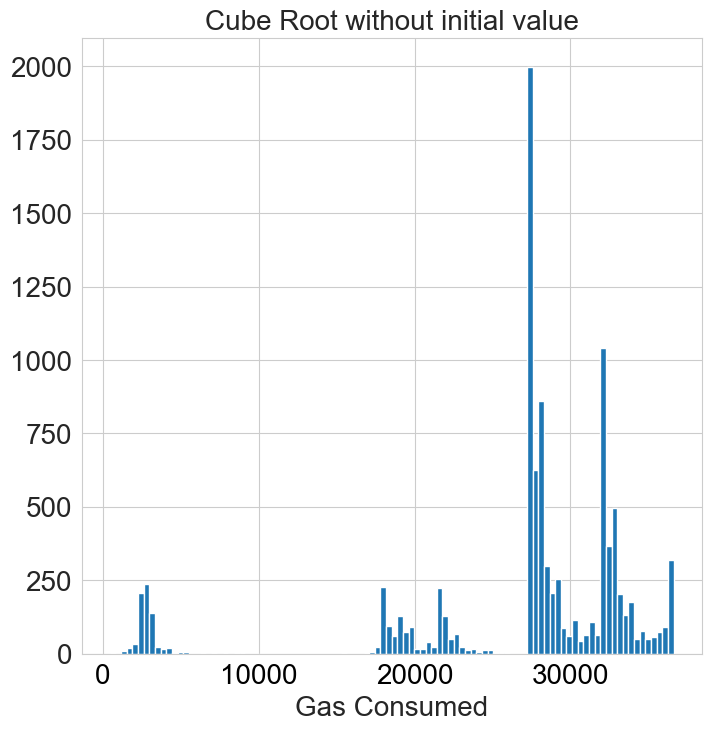

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.hist(data.gas_used_noguess, 100)
ax.set_title("Cube Root without initial value", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_xlabel("Gas Consumed", fontsize=20)

What's the relationship between initial guess and gas costs?

In [39]:
data_non_zero = data[data.input.apply(lambda x: mpz(x)) != 0]

data_non_zero["initial_value"] = data_non_zero.initial_value.apply(lambda x: mpz(x))
data_non_zero["cbrt_implementation_guess"] = data_non_zero.cbrt_implementation_guess.apply(lambda x: mpz(x))
data_non_zero["perc_diff_guess_output"] = 100 * (
    data_non_zero.cbrt_implementation_guess - data_non_zero.initial_value
    ) / data_non_zero.cbrt_implementation_guess
data_non_zero

,input,initial_value,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,gas_used_noguess,gas_used_initial_value,perc_diff_guess_output
0,1,2000000000000,1000000000000,1000000000000,1000000000000,36608,2039,-100.0
2,17447,49278845119011,25936234273164,25936234273164,25936234273164,28288,2039,-89.999999999997684
3,323644660184762007500615537352873936970,68657736569204787642368,6865773656920477287841792,6865773656920483309433178,6865773656920483309433178,22047,7240,99.0
4,40614,309362568095484,34373618677276,34373618677276,34373618677276,27508,3079,-800.0
5,90,6722107119835,4481404746557,4481404746557,4481404746557,32708,1779,-49.999999999988844
...,...,...,...,...,...,...,...,...
9995,33545,322509564446,32250956444602,32250956444602,32250956444602,27768,7240,99.000000000000057
9996,13908273289270956161,11108031709655463936,2404867049718409728,2404867049718409608,2404867049718409608,2807,2819,-361.89795444018927
9997,3309837219,9659370888716376,1490283449670558,1490283449670557,1490283449670557,17888,2819,-548.15662355048516
9998,154,10184205980833,5360108410965,5360108410965,5360108410965,32188,2039,-89.999999999990678


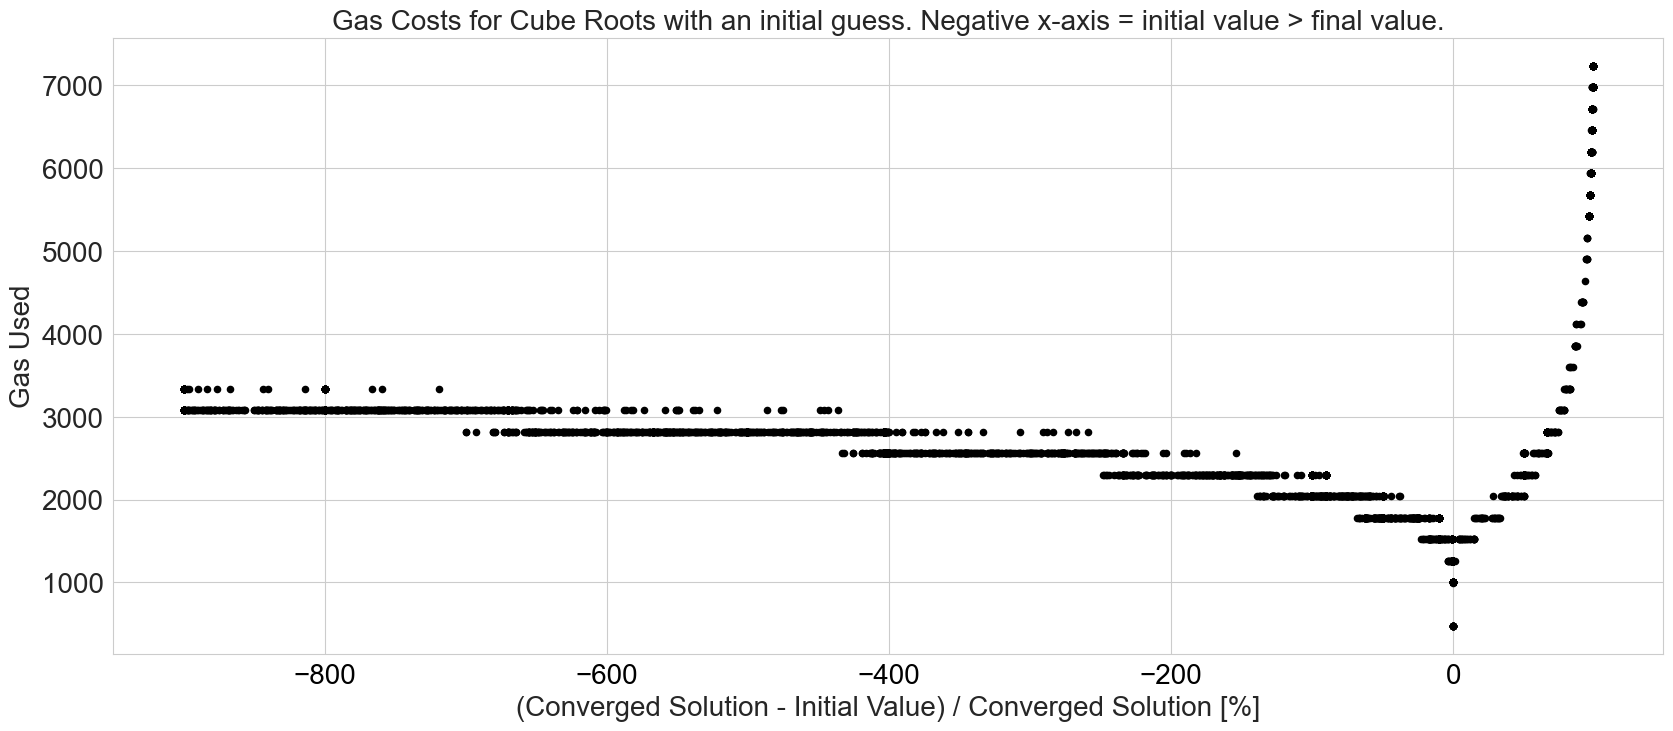

In [40]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    data_non_zero.perc_diff_guess_output,
    data_non_zero.gas_used_initial_value,
    s=20,
    color="black",
)

ax.set_xlabel("(Converged Solution - Initial Value) / Converged Solution [%]", fontsize=20)
ax.set_ylabel("Gas Used", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_title("Gas Costs for Cube Roots with an initial guess. Negative x-axis = initial value > final value.", fontsize=20);


The results above suggest that it's much better to overshoot the initial guess rather than undershoot it.

Now let's check how cube roots do with a educated initial guess, using the following logic:

qbrt(a) = qbrt(2**(log2(a))) = 2**(log2(a) / 3) ≈ 2**|log2(a)/3|

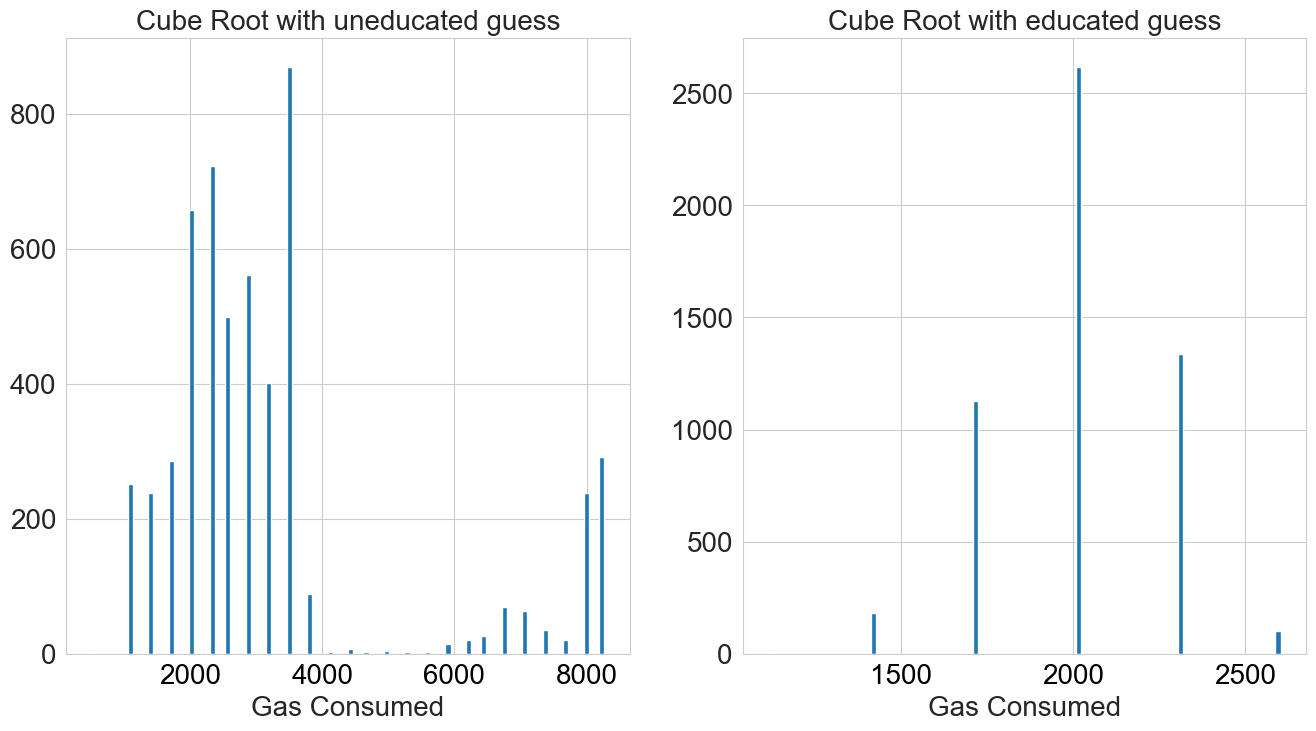

In [43]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

axes[0].hist(data.gas_used_initial_value, 100)
axes[0].set_title("Cube Root with uneducated guess", fontsize=20)

axes[1].hist(data.gas_used_educated_guess, 100)
axes[1].set_title("Cube Root with educated guess", fontsize=20)

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.set_xlabel("Gas Consumed", fontsize=20)

Using educated guess, gas costs are brought down to maximally 2.5k units (avg 2k units). This, however, does not include the operations for calculating the initial guess.